<h1> Python for Data Science </h1>

<h4> 1. Reading the .csv file as dataframe  </h4>

In [273]:
import pandas as pd

df=pd.read_csv('gapminder_clean.csv')

print(df.head)

<bound method NDFrame.head of       Unnamed: 0 Country Name  Year  Agriculture, value added (% of GDP)   
0              0  Afghanistan  1962                                  NaN  \
1              1  Afghanistan  1967                                  NaN   
2              2  Afghanistan  1972                                  NaN   
3              3  Afghanistan  1977                                  NaN   
4              4  Afghanistan  1982                                  NaN   
...          ...          ...   ...                                  ...   
2602        2602     Zimbabwe  1987                            14.407528   
2603        2603     Zimbabwe  1992                             7.413793   
2604        2604     Zimbabwe  1997                            18.934082   
2605        2605     Zimbabwe  2002                            14.029007   
2606        2606     Zimbabwe  2007                            21.597907   

      CO2 emissions (metric tons per capita)   
0        

<h4> 2. Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.  </h4>

In [275]:
import matplotlib.pyplot as plt

filter_year= 1962
Year_1962=df[df['Year']==filter_year]


#Listing the countries that have missing values of CO2 and GDP per capita for the year 1962
countries = df['Country Name'].unique()
countries_no_data_in_1962 = [country for country in countries if country not in Year_1962['Country Name'].values]

Data_gdp_and_Co2= Year_1962.dropna(subset=['CO2 emissions (metric tons per capita)', 'gdpPercap'])
Countries_used_for_graph=[country for country in Data_gdp_and_Co2['Country Name']]
Countries_not_included_in_graph= [country for country in countries if country not in Data_gdp_and_Co2['Country Name'].values]

#Pulling the data to graph
Data_gdp_and_Co2= Data_gdp_and_Co2[['Country Name','CO2 emissions (metric tons per capita)', 'gdpPercap']]
Data_gdp_and_Co2['CO2 emissions (metric tons per capita)']=Data_gdp_and_Co2['CO2 emissions (metric tons per capita)'].round(1)

#There are a few countries that were out of the analysis due to lack of data
print(f"{len(Countries_not_included_in_graph)} countries were not included in the graph because there is missing data ")



155 countries were not included in the graph because there is missing data 


In [276]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool, ColumnDataSource, Range1d

Data_gdp_and_Co2['gdpPercap']=Data_gdp_and_Co2['gdpPercap']/1000 #This is to have better numbers in the Y axis
source = ColumnDataSource(data=Data_gdp_and_Co2)
p=figure(title="CO2 Emissions vs. GDP per Capita in 1962", x_axis_label='CO2 emissions (metric tons per capita)', y_axis_label='GDP per Capita (Thousand of USD)')
p.circle('CO2 emissions (metric tons per capita)', 'gdpPercap', size=5, source=source)

p.x_range =Range1d(0, 20)  # We are leaving Kuwait out of the graph for visualizatin purposes
p.y_range = Range1d(0, 40)

hover = HoverTool(
    tooltips=[
    ('Country', '@{Country Name}'),
    ('CO2 emissions', '@{CO2 emissions (metric tons per capita)}'),
    ('GDP per Capita', '@gdpPercap{0.0}')
    ],

)
#Details of the graph
p.add_tools(hover)
p.background_fill_color = "white"
p.border_fill_color = "white"
p.grid.visible = False
p.outline_line_color = None
p.title.text_font_size= "14pt"
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "12pt"
# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

<h4>3. On the filtered data, calculate the correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the correlation and associated p value? </h4>

In [32]:
#We will use stats from scipy to get the correlation coefficient and the p value
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(Data_gdp_and_Co2['CO2 emissions (metric tons per capita)'],Data_gdp_and_Co2['gdpPercap'])

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.9261174384645389
P-value: 1.1011375887286842e-46


<h4>4. On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step...</h4>

In [33]:
#Keeping data only where there is values for both variables

Data= df.dropna(subset=['CO2 emissions (metric tons per capita)', 'gdpPercap'])
Data_subset= Data[['Country Name','Year','CO2 emissions (metric tons per capita)', 'gdpPercap']]

#Now we will iterate over our data frame and see which year has the highest correlation
Years= Data_subset['Year'].unique()
max=0
for y in Years:
    Year_y=Data_subset[Data_subset['Year']==y]
    correlation_coefficient=Year_y['CO2 emissions (metric tons per capita)'].corr(Year_y['gdpPercap'])
    if (correlation_coefficient>max):
        max= correlation_coefficient
        year_of_max_correlation=y


print(f"The year of max correlation is {year_of_max_correlation}")    

#We filter the DF for the next excercise 
Data_Year_Max_Correlation= df[df['Year']==year_of_max_correlation]




The year of max correlation is 1967


<h4>5. Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.</h4>

In [277]:
#Again, there are countries that do not have data for CO2 emissions or gdp per capita, so those will be filtered out

Data_Year_Max_Correlation= Data_Year_Max_Correlation[['Country Name','CO2 emissions (metric tons per capita)', 'gdpPercap', 'pop', 'continent']]
Data_Year_Max_Correlation= Data_Year_Max_Correlation.dropna(subset=['CO2 emissions (metric tons per capita)', 'gdpPercap'])



In [280]:
import plotly.express as px

fig = px.scatter(Data_Year_Max_Correlation, x="CO2 emissions (metric tons per capita)", y="gdpPercap", color="continent", size='pop', hover_name ="Country Name",  opacity = 0.6,
                 title= (f"Data of CO2 emissions and GDP per capita in {year_of_max_correlation}"))
fig.update_layout(
    template='plotly_white',  # Use white template
    xaxis=dict(
        title= 'CO2 emissions (metric tons per capita)',
        gridcolor='rgba(0,0,0,0)',  # Set grid lines color to transparent
        color='black',              # Set X axis color to black
        linewidth=2                 # Set X axis line width to 2 (bold)
    ),
    yaxis=dict(
        title='Gdp per capita (USD)',
        gridcolor='rgba(0,0,0,0)',  # Set grid lines color to transparent
        color='black',              # Set Y axis color to black
        linewidth=2,                # Set Y axis line width to 2 (bold)
    )
)

fig.update_xaxes(range=[0,25])  
fig.update_yaxes(range=[0,40000]) #We are not displaying Kuwait

fig.show()



<h3>Now, without further guidance, use your Python Data Science skills (and the correct statistical tests) to answer the following (use the unfiltered dataset): </h3>

<h4>1. What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? (Stats test needed)</h4>

In [281]:
#Given that the predictor variable is Categorical ('Continent') and the outcome variable is Quantitative ('Energy use') we would run an ANOVA test

#We will work only with those countries that have values for Energy use and Continent and we will conduct the analysis for each year

data_energy= df.dropna(subset=['Energy use (kg of oil equivalent per capita)', 'continent'])
data_energy=data_energy[['Country Name','Year','Energy use (kg of oil equivalent per capita)', 'continent']]





In [282]:
# Perform one-way ANOVA
from scipy.stats import f_oneway

Anova_Results=[]

for year in data_energy['Year'].unique():

    #Filter the data set per year
    df_year = data_energy[data_energy['Year'] == year]
    #Grouping data according to continent and energy use
    grouped_data = [df_year[df_year['continent'] == continent]['Energy use (kg of oil equivalent per capita)'] for continent in df_year['continent'].unique()]    
    #Performing ANOVA of the grouped data
    f_statistic, p_value = f_oneway(*grouped_data)
    
    Anova_Results.append({'Year': year, 'F-statistic': f_statistic, 'p-value': p_value})

Anova_Results=pd.DataFrame(Anova_Results)
# Print the ANOVA results
print(Anova_Results)
#

   Year  F-statistic   p-value
0  1972     7.366889  0.000036
1  1977     8.455679  0.000008
2  1982     7.551775  0.000027
3  1987     8.495935  0.000007
4  1992     7.897726  0.000015
5  1997     7.057320  0.000049
6  2002     6.637304  0.000090
7  2007     6.328448  0.000131
8  1962     8.737694  0.000664
9  1967     9.642467  0.000334


<h5>We can see that the p-value for all years is less than 0.05 so we reject the null hypothesis and we conclude that there is a significant difference in energy use across continents.
We will plot the energy use in each continent for each year to complement this analysis</h5>

In [283]:
import plotly.graph_objects as go
#One of the best options to visualize these differences is the boxplot
# We will create a boxplot for each year
fig = go.Figure()
df_sorted = data_energy.sort_values(by='Year')

years = df_sorted['Year'].unique()
for i, year in enumerate(years, start=1):
    df_year = data_energy[data_energy['Year'] == year]
    fig.add_trace(go.Box(y=df_year['Energy use (kg of oil equivalent per capita)'], x=df_year['continent'], name=str(year), 
                         marker_color=f'rgba(255, 100, 0, {i/len(years)})',boxpoints='suspectedoutliers'))

# Update the layout
fig.update_layout(template='plotly_white',
                  title='Energy Use by Continent from 1962 to 2007',
                  xaxis=dict(title= 'Continents',gridcolor='rgba(0,0,0,0)',color='black',linewidth=2),
                  yaxis=dict(title='Energy use (kg of oil equivalent per capita)',gridcolor='rgba(0,0,0,0)',color='black',linewidth=2),
                  boxmode='group',
                  boxgroupgap=0.5)


# Show the plot
fig.show()

In [284]:
#We arrange our data set to see that for 1962 and 1967 'Americas' contain only values for Canada and USA and Asia only has values for Japan 
df_americas = data_energy[data_energy['continent'] == 'Americas']
df_americas_ordered = df_americas.sort_values(by='Year')
df_asia = data_energy[data_energy['continent'] == 'Asia']
df_asia_ordered = df_asia.sort_values(by='Year')

#We will filtrate our data to delete the first 2 boxplots of The Americas and Asia
df_filtered2 = data_energy[~((data_energy['continent'].isin(['Americas', 'Asia']))&(data_energy['Country Name'].isin(['United States', 'Canada', 'Japan'])) & (data_energy['Year'].isin([1962, 1967])))]


In [285]:
import plotly.graph_objects as go

#We make the box plot again
# Create a boxplot for each year
fig = go.Figure()
df_sorted = df_filtered2.sort_values(by='Year')

years = df_sorted['Year'].unique()
for i, year in enumerate(years, start=1):
    df_year = df_filtered2[df_filtered2['Year'] == year]
    fig.add_trace(go.Box(y=df_year['Energy use (kg of oil equivalent per capita)'], x=df_year['continent'], name=str(year), 
                         marker_color=f'rgba(255, 100, 0, {i/len(years)})',boxpoints='suspectedoutliers'))

# Update the layout
fig.update_layout(template='plotly_white',
                  title='Energy Use by Continent from 1962 to 2007',
                  xaxis=dict(title= 'Continents',gridcolor='rgba(0,0,0,0)',color='black',linewidth=2),
                  yaxis=dict(title='Energy use (kg of oil equivalent per capita)',gridcolor='rgba(0,0,0,0)',color='black',linewidth=2),
                  boxmode='group',
                  boxgroupgap=0.5)


# Show the plot
fig.show()

<h4>2. Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990? (Stats test needed)</h4>

In [286]:
#For this item, we will run a T-test between Europe and Asia for the years after 1990 and we will compare the Imports of goods and services
# First, we will filter our data set just to have the continent, country name, year and Imports of goods and services (% of GDP)

#Data filtering
data_imports=df[df['Year']> 1990]
data_imports = data_imports[(data_imports['continent'] == 'Asia') | (data_imports['continent'] == 'Europe')]
data_imports= data_imports.dropna(subset=['Imports of goods and services (% of GDP)', 'continent']) #Here we drop those rows that have no values for imports or continent
data_imports=data_imports[['Country Name','Year','Imports of goods and services (% of GDP)', 'continent']]

print(data_imports)

            Country Name  Year  Imports of goods and services (% of GDP)   
8            Afghanistan  2002                                 65.287704  \
9            Afghanistan  2007                                 58.350047   
16               Albania  1992                                 88.512248   
17               Albania  1997                                 34.189995   
18               Albania  2002                                 44.335366   
...                  ...   ...                                       ...   
2551             Vietnam  2002                                 57.249342   
2552             Vietnam  2007                                 84.087509   
2564  West Bank and Gaza  1997                                 73.041119   
2565  West Bank and Gaza  2002                                 62.815682   
2566  West Bank and Gaza  2007                                 77.810672   

     continent  
8         Asia  
9         Asia  
16      Europe  
17      Europe  
18

In [287]:
from scipy.stats import ttest_ind

# separating both data sets
imports_asia = data_imports[data_imports['continent'] == 'Asia']['Imports of goods and services (% of GDP)']
imports_europe = data_imports[data_imports['continent'] == 'Europe']['Imports of goods and services (% of GDP)']

# Perform t-test
t_statistic, p_value = ttest_ind(imports_asia, imports_europe)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: 1.4185256887958868
P-value: 0.15751969325554196


<h5>We can see that the p-value is greater than 0.05 so we conclude that there is no significant evidence between imports of good and services between Asia and Europe after 1990. We will plot the distribution of Imports along with their means to see it graphically</h5>

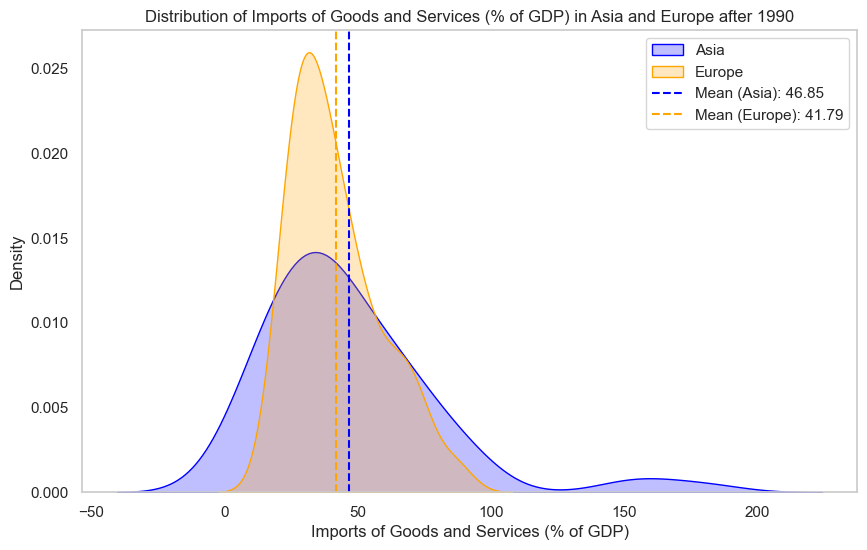

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
# Create a figure and axis
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

#Calculate the mean of imports for both continents
mean_asia = imports_asia.mean()
mean_europe = imports_europe.mean()

# Plot KDE for Asia
sns.kdeplot(imports_asia, color='blue', label='Asia', fill=True)

# Plot KDE for Europe
sns.kdeplot(imports_europe, color='orange', label='Europe', fill=True)

#Adding both mean lines
plt.axvline(mean_asia, color='blue', linestyle='--', label=f'Mean (Asia): {mean_asia:.2f}')
plt.axvline(mean_europe, color='orange', linestyle='--', label=f'Mean (Europe): {mean_europe:.2f}')

# Add legend and labels
plt.title('Distribution of Imports of Goods and Services (% of GDP) in Asia and Europe after 1990')
plt.xlabel('Imports of Goods and Services (% of GDP)')
plt.grid(None)
plt.ylabel('Density')
plt.legend()
plt.show()

<h5><i>The negative data for Asia is because of this type of graph to see distribution. There are not negative values for Imports of good and services</i></h5>

<h3>3. What is the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)</h3>

In [289]:
#First, we start by cleaning the dataset and discard columns that we will not use
data_pop_dens= df.dropna(subset=['Population density (people per sq. km of land area)']) #Actually this line will not drop any row since all of them contain data 
data_pop_dens=df[['Country Name','Year','Population density (people per sq. km of land area)']]



In [291]:
#For each year, we are going to get the top 5 countries with the highest population density per sq km and then we will elaborate a ranking of countries for all years
#Creating a DF to store our values in order to graph the countries
Results = pd.DataFrame(columns=['Year', 'Country Name', 'Population density (people per sq. km of land area)'])

for year in data_pop_dens['Year'].unique():
    df_year = data_pop_dens[data_pop_dens['Year'] == year] #filtering for each year
    sorted_df = df_year.sort_values(by='Population density (people per sq. km of land area)', ascending=False)    
    top_five_countries_year = sorted_df.head(5)
    
    # Append the results to the new dataframe
    Results = pd.concat([Results,top_five_countries_year[['Year', 'Country Name', 'Population density (people per sq. km of land area)']]])

#This is our data frame with the results, in case you want to print it just erase the # in the line below
#print(Results)

#Now we will count how many appearances does each country have
from collections import Counter
country_counts = Counter(Results['Country Name'])
country_dict = dict(country_counts.most_common(2))
country1, count1 = list(country_counts.keys())[0], list(country_counts.values())[0]
country2, count2 = list(country_counts.keys())[1], list(country_counts.values())[1]

print(f'\n The two countries with the highest population density across all years are {country1} with {count1} appearances and {country2} with {count2} appearances.')
    


 The two countries with the highest population density across all years are Monaco with 10 appearances and Macao SAR, China with 10 appearances.


<h5> The countries with the highest population density across all years are Monaco and Macao SAR China with 5 appearances each. Let's check the graphs </hs>

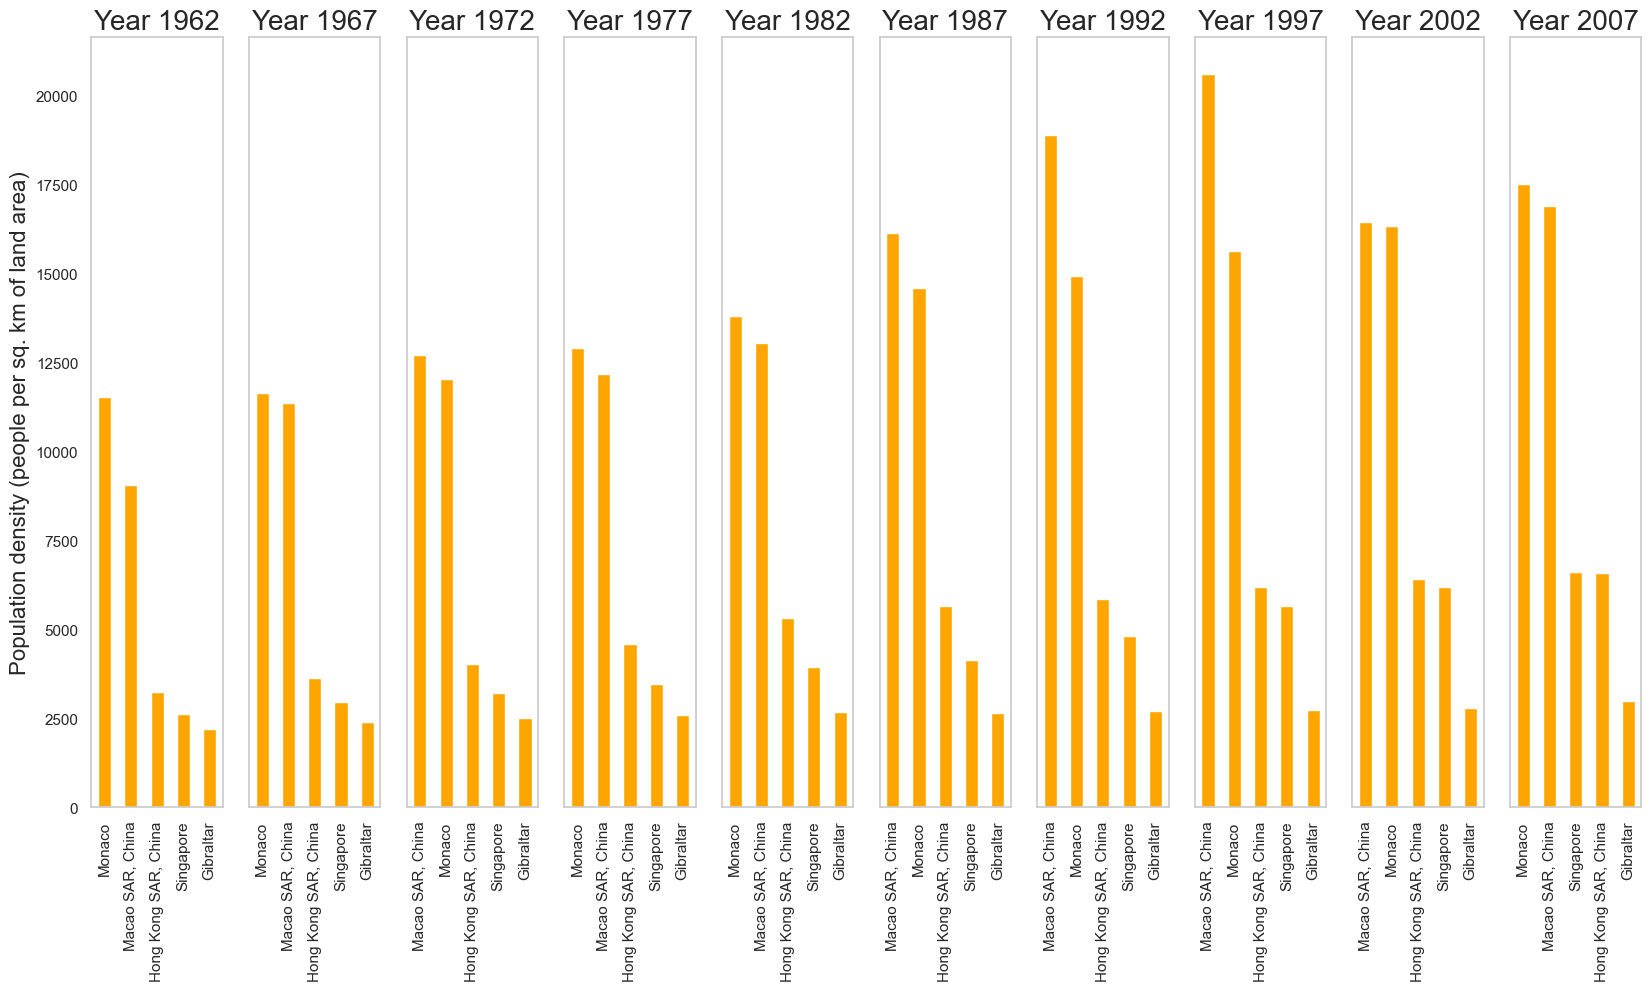

In [299]:
#Building 10 graphs (one per year) for the pop density top 5 countries
import matplotlib.pyplot as plt
import plotly.graph_objs as go


years = Results['Year'].unique()
num_years = len(years)

fig, axs = plt.subplots(1, num_years, figsize=(20, 10), sharey=True)

#We iterate in each year to have 10 graphs
for i, year in enumerate(years):
    year_data = Results[Results['Year'] == year]
    ax = axs[i]
    year_data.plot(kind='bar', x='Country Name', y='Population density (people per sq. km of land area)',color='orange', ax=ax, capsize=4)
    ax.set_title(f'Year {year}',fontsize=20)
    ax.set_ylabel('Population density (people per sq. km of land area)',fontsize=16)
    ax.grid(visible=False)
    ax.set_xlabel('')
    ax.legend().remove()  # Remove legend to avoid overlap

plt.show()

<h3>4. What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' between 1962 and 2007?</h3>

In [300]:
data_life_expectancy= df.dropna(subset=['Life expectancy at birth, total (years)', 'Year', 'Country Name'])

#Leaving only countries that have data for the 10 years
countries_to_filter=[]
for country in data_life_expectancy['Country Name'].unique():
    data_country= data_life_expectancy[data_life_expectancy['Country Name']== country]
    if ((data_country['Life expectancy at birth, total (years)'].count())!= 10):
        countries_to_filter.append(country)

filtered_life_expectancy = data_life_expectancy[~data_life_expectancy['Country Name'].isin(countries_to_filter)]
filtered_life_expectancy= filtered_life_expectancy[['Year', 'Country Name','Life expectancy at birth, total (years)','continent']]

print(f"{len(countries_to_filter)} countries were removed from the analysis because they did not contained data for Life Expectancy in the 10 years timepoints")


16 countries were removed from the analysis because they did not contained data for Life Expectancy in the 10 years timepoints


In [302]:
# We will calculate de difference between each time point (in total 10 time points) for each country and then we will aggregate this values. 
# The countries with the highest values will be those who experienced the highest change in life expectancy between 1962 and 2007

data_life_exp_change=[]
for country in filtered_life_expectancy['Country Name'].unique():
    data_filter= filtered_life_expectancy[filtered_life_expectancy['Country Name']== country]
    change= ((data_filter['Life expectancy at birth, total (years)'].diff()).sum())
    data_life_exp_change.append((country,change))

final_data=pd.DataFrame(data_life_exp_change, columns=['Country Name', 'Change in life expectancy'])
final_data2 =final_data.sort_values(by='Change in life expectancy', ascending=False)
print(final_data2)



           Country Name  Change in life expectancy
136            Maldives                  36.916146
20               Bhutan                  33.198951
213         Timor-Leste                  31.085146
217             Tunisia                  30.860756
164                Oman                  30.823098
..                  ...                        ...
16              Belarus                   1.567585
180  Russian Federation                   0.476146
221             Ukraine                  -0.923902
123             Lesotho                  -2.520024
235            Zimbabwe                  -8.100146

[236 rows x 2 columns]


In [303]:
#Now let's evaluate the life expectancy in 2007
filtered_life_expectancy_2007= filtered_life_expectancy[filtered_life_expectancy['Year']==2007].sort_values(by='Life expectancy at birth, total (years)', ascending=False)

print(filtered_life_expectancy_2007)

      Year              Country Name  Life expectancy at birth, total (years)   
1179  2007                     Japan                                82.507073  \
1009  2007      Hong Kong SAR, China                                82.326829   
2312  2007               Switzerland                                81.741463   
1079  2007                   Iceland                                81.453659   
1159  2007                     Italy                                81.434146   
...    ...                       ...                                      ...   
2292  2007                 Swaziland                                46.772390   
399   2007  Central African Republic                                45.687390   
2069  2007              Sierra Leone                                45.488366   
1359  2007                   Lesotho                                44.882220   
2606  2007                  Zimbabwe                                44.177756   

     continent  
1179      

In [304]:
print('Those are the top 5 countries that shown the greatest increase in Life expectancy between 1962 and 2007 ')
print((final_data2[['Country Name','Change in life expectancy']]).head(5) )
print('\nThose are the top 5 countries that shown the lowest increase in Life expectancy between 1962 and 2007')
print((final_data2[['Country Name','Change in life expectancy']]).tail(5))
print('\nFinally, those are the top 5 countries with the highest life expectancy in 2007')
print((filtered_life_expectancy_2007[['Country Name','Life expectancy at birth, total (years)']]).head(5))


Those are the top 5 countries that shown the greatest increase in Life expectancy between 1962 and 2007 
    Country Name  Change in life expectancy
136     Maldives                  36.916146
20        Bhutan                  33.198951
213  Timor-Leste                  31.085146
217      Tunisia                  30.860756
164         Oman                  30.823098

Those are the top 5 countries that shown the lowest increase in Life expectancy between 1962 and 2007
           Country Name  Change in life expectancy
16              Belarus                   1.567585
180  Russian Federation                   0.476146
221             Ukraine                  -0.923902
123             Lesotho                  -2.520024
235            Zimbabwe                  -8.100146

Finally, those are the top 5 countries with the highest life expectancy in 2007
              Country Name  Life expectancy at birth, total (years)
1179                 Japan                                82.507073
1009 

In [305]:
#We will plot change in life expectancy in an horizontal bar chart

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show,output_notebook
from bokeh.sampledata.sprint import sprint
from bokeh.transform import linear_cmap
from bokeh.transform import factor_cmap
from bokeh.palettes import Reds, Greens

output_notebook()

data= pd.concat([final_data2.head(5), final_data2.tail(5)])
source = ColumnDataSource(data)
#We will display in green countries whose life expectancy growth and in red those countries whose life expectancy decreased or didn't increased much
green_palette = Greens[5]  # Choose the number of shades of green 
red_palette = Reds[5]  # Choose the number of shades of red 
palette = green_palette[::] + red_palette [::-1] #Creating a palette
color_mapper = factor_cmap(field_name='Country Name', palette=palette, factors=data['Country Name'])

p = figure(y_range=data['Country Name'], tools="", width=1000, height=400, title="Top 5 countries with the highest and lowest increase in life expectancy between 1962 and 2007")
p.hbar(y='Country Name', right='Change in life expectancy', height=0.3, source=source,line_color='white' ,fill_color=color_mapper)

#Graph details
p.ygrid.grid_line_color = None
p.xgrid.grid_line_color= None
p.xaxis.axis_label = "Increase in life expectancy (year)"
p.outline_line_color = None

show(p)

Loading BokehJS ...

<h4>Finally we can evaluate the mean life expectancy at birth in each continent </h4>

In [306]:
print(filtered_life_expectancy)

grouped_data_life = filtered_life_expectancy.groupby(['continent', 'Year'])['Life expectancy at birth, total (years)'].mean().reset_index()

print(grouped_data_life)

      Year Country Name  Life expectancy at birth, total (years) continent
0     1962  Afghanistan                                33.219902      Asia
1     1967  Afghanistan                                35.389415      Asia
2     1972  Afghanistan                                37.610146      Asia
3     1977  Afghanistan                                40.110146      Asia
4     1982  Afghanistan                                43.230732      Asia
...    ...          ...                                      ...       ...
2602  1987     Zimbabwe                                61.753805    Africa
2603  1992     Zimbabwe                                56.491976    Africa
2604  1997     Zimbabwe                                46.065902    Africa
2605  2002     Zimbabwe                                40.679146    Africa
2606  2007     Zimbabwe                                44.177756    Africa

[2360 rows x 4 columns]
   continent  Year  Life expectancy at birth, total (years)
0     Africa  1

In [307]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10,Viridis
from bokeh.transform import factor_cmap

source = ColumnDataSource(grouped_data_life)
palette = Viridis[len(grouped_data_life['continent'].unique())]
# Create a figure
p = figure(title='Evolution of mean life expectancy by continent from 1962 to 2007', x_axis_label='Year', y_axis_label='Mean Life Expectancy (years)')

for i, continent in enumerate(sorted(grouped_data_life['continent'].unique())):
    continent_data = grouped_data_life[grouped_data_life['continent'] == continent]
    p.line(x='Year', y='Life expectancy at birth, total (years)', source=continent_data, legend_label=continent,
           line_width=1, line_color=palette[i])
    p.circle(x='Year', y='Life expectancy at birth, total (years)', source=continent_data, size=2, color=palette[i], legend_label=continent)

# Add a hover tool
hover = HoverTool(tooltips=[('Continent', '@continent'), ('Year', '@Year'), ('Mean Life Expectancy', '@{Life expectancy at birth, total (years)}')])
p.add_tools(hover)

p.ygrid.grid_line_color = None
p.xgrid.grid_line_color= None
p.legend.location = 'bottom_right'
p.outline_line_color = None
# Show the plot
show(p)